In [1]:
using Random, Distributions
using LinearAlgebra
using Plots

file = open("data.txt", "r");
s = read(file, String);
close(file);

data = reshape(parse.(Float64, split(s)),(2,30))';
x = data[:,1];
y = data[:,2];

In [2]:
function f(beta)
    theta = beta[1:4];
    x = beta[5:34];
    return theta[1].*exp.(theta[2].*x) + theta[3].*cos.(x) .+ theta[4]
end

function df(beta)
    theta = beta[1:4];
    x = beta[5:34];
    D = zeros((60,4+30));
    D[1:30,1] = exp.(theta[2].*x)
    D[1:30,2] = theta[1].*x.*exp.(theta[2].*x)
    D[1:30,3] .= cos.(x)
    D[1:30,4] .= 1
    for i = 1:30
        D[i,4+i] =  theta[1] * theta[2] * exp(theta[2]*x[i]) - theta[3] * sin(x[i]);
        D[30+i,4+i] = 1;
    end
    return D
end

function LM_loss(x,y,u,theta)
   return norm(f(theta, u) .- y)^2 + norm(u .- x)^2 
end

LM_loss (generic function with 1 method)

In [3]:
theta = rand(Uniform(-1,1), (4,1))
u = x;
beta = [theta ; u];
Kmax = 300;
lambda = 1e-4;

In [4]:
loss_value = zeros(Kmax);
for i =1:Kmax
    D = df(beta)
    F = [f(beta).-y; u.-x]
    beta = beta .- (transpose(D) * D + lambda * I) \ (transpose(D)* F)
    loss_value[i] = norm(F)^2 + lambda * norm(theta)^2
end

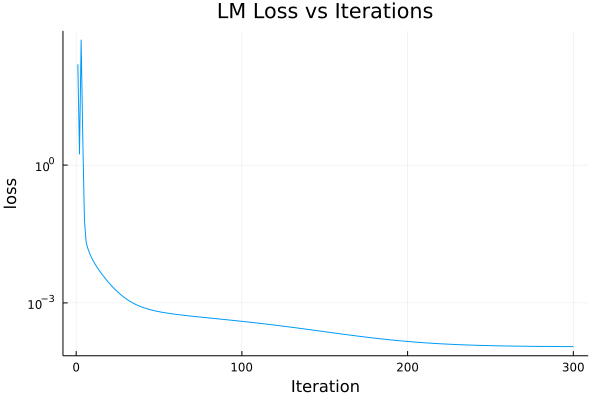

In [5]:
plot(1:Kmax, loss_value,
    yaxis=:log,
    xlabel = "Iteration",
    ylabel = "loss",
    title = "LM Loss vs Iterations",
    legend = false,
    grid = true)

In [6]:
println("Final Result:")
println("Theta 1 is " * string(beta[1]))
println("Theta 2 is " * string(beta[2]))
println("Theta 3 is " * string(beta[3]))
println("Theta 4 is " * string(beta[4]))

Final Result:
Theta 1 is -1.8306640691965865
Theta 2 is 0.1793195040997058
Theta 3 is 0.8220479344838888
Theta 4 is 1.7625486687139993


In [8]:
plot(x, y, seriestype = :scatter, label="Scatter Data")
t = minimum(x):0.01:maximum(x)
plot!(t, beta[1].*exp.(beta[2].*t) + beta[3].*cos.(t) .+ beta[4] ,label = "Fitted Curve")
plot!(xlabel = "X", ylabel = "Y", title = "Orthogonal Distance Regression",grid = true)
savefig("plot2.png")